In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [41]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spending', ylabel='Density'>

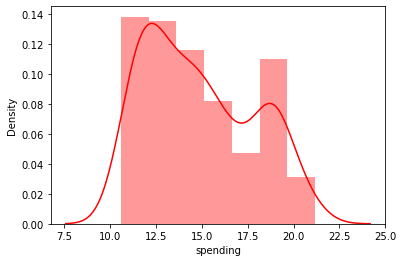

In [10]:
sns.distplot(df['spending'], color = "r")

<AxesSubplot:xlabel='spending'>

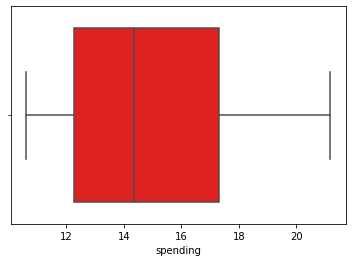

In [13]:
sns.boxplot(x="spending" ,color = "r", data=df)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='advance_payments', ylabel='Density'>

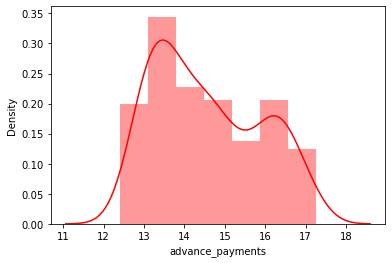

In [14]:
sns.distplot(df['advance_payments'], color = "r")

<AxesSubplot:xlabel='advance_payments'>

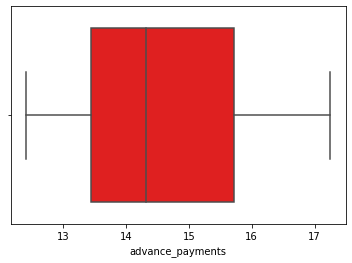

In [15]:
sns.boxplot(x="advance_payments" ,color = "r", data=df)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='probability_of_full_payment', ylabel='Density'>

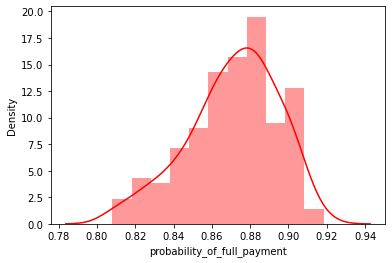

In [16]:
sns.distplot(df['probability_of_full_payment'], color = "r")

<AxesSubplot:xlabel='probability_of_full_payment'>

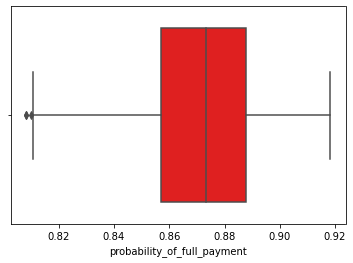

In [24]:
sns.boxplot(x="probability_of_full_payment" ,color = "r", data=df)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='current_balance', ylabel='Density'>

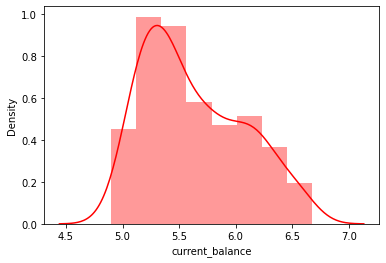

In [25]:
sns.distplot(df['current_balance'], color = "r")

<AxesSubplot:xlabel='current_balance'>

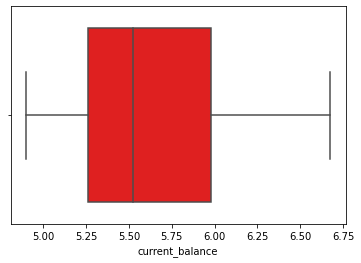

In [26]:
sns.boxplot(x="current_balance" ,color = "r", data=df)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_limit', ylabel='Density'>

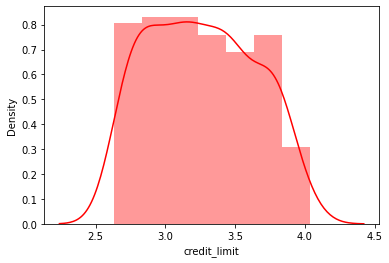

In [27]:
sns.distplot(df['credit_limit'], color = "r")

<AxesSubplot:xlabel='credit_limit'>

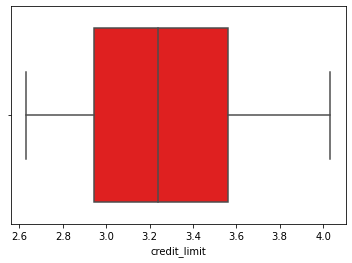

In [28]:
sns.boxplot(x="credit_limit" ,color = "r", data=df)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_payment_amt', ylabel='Density'>

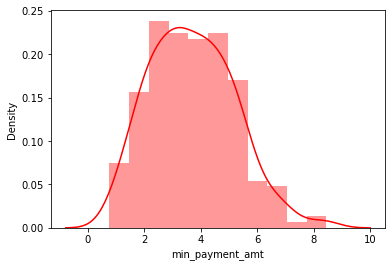

In [29]:
sns.distplot(df['min_payment_amt'], color = "r")

<AxesSubplot:xlabel='min_payment_amt'>

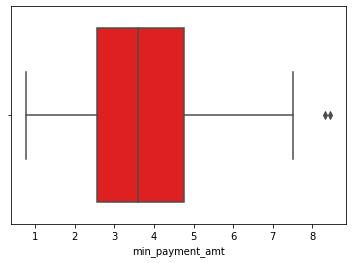

In [30]:
sns.boxplot(x="min_payment_amt" ,color = "r", data=df)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Density'>

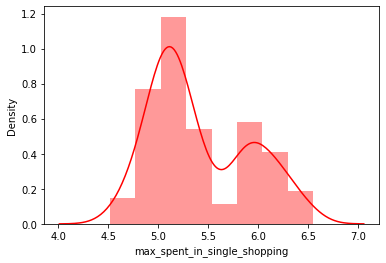

In [31]:
sns.distplot(df['max_spent_in_single_shopping'], color = "r")

<AxesSubplot:xlabel='max_spent_in_single_shopping'>

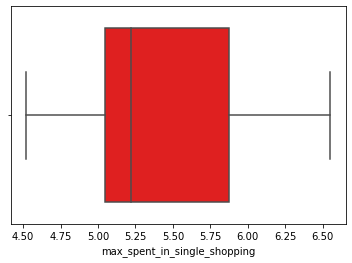

In [32]:
sns.boxplot(x="max_spent_in_single_shopping" ,color = "r", data=df)

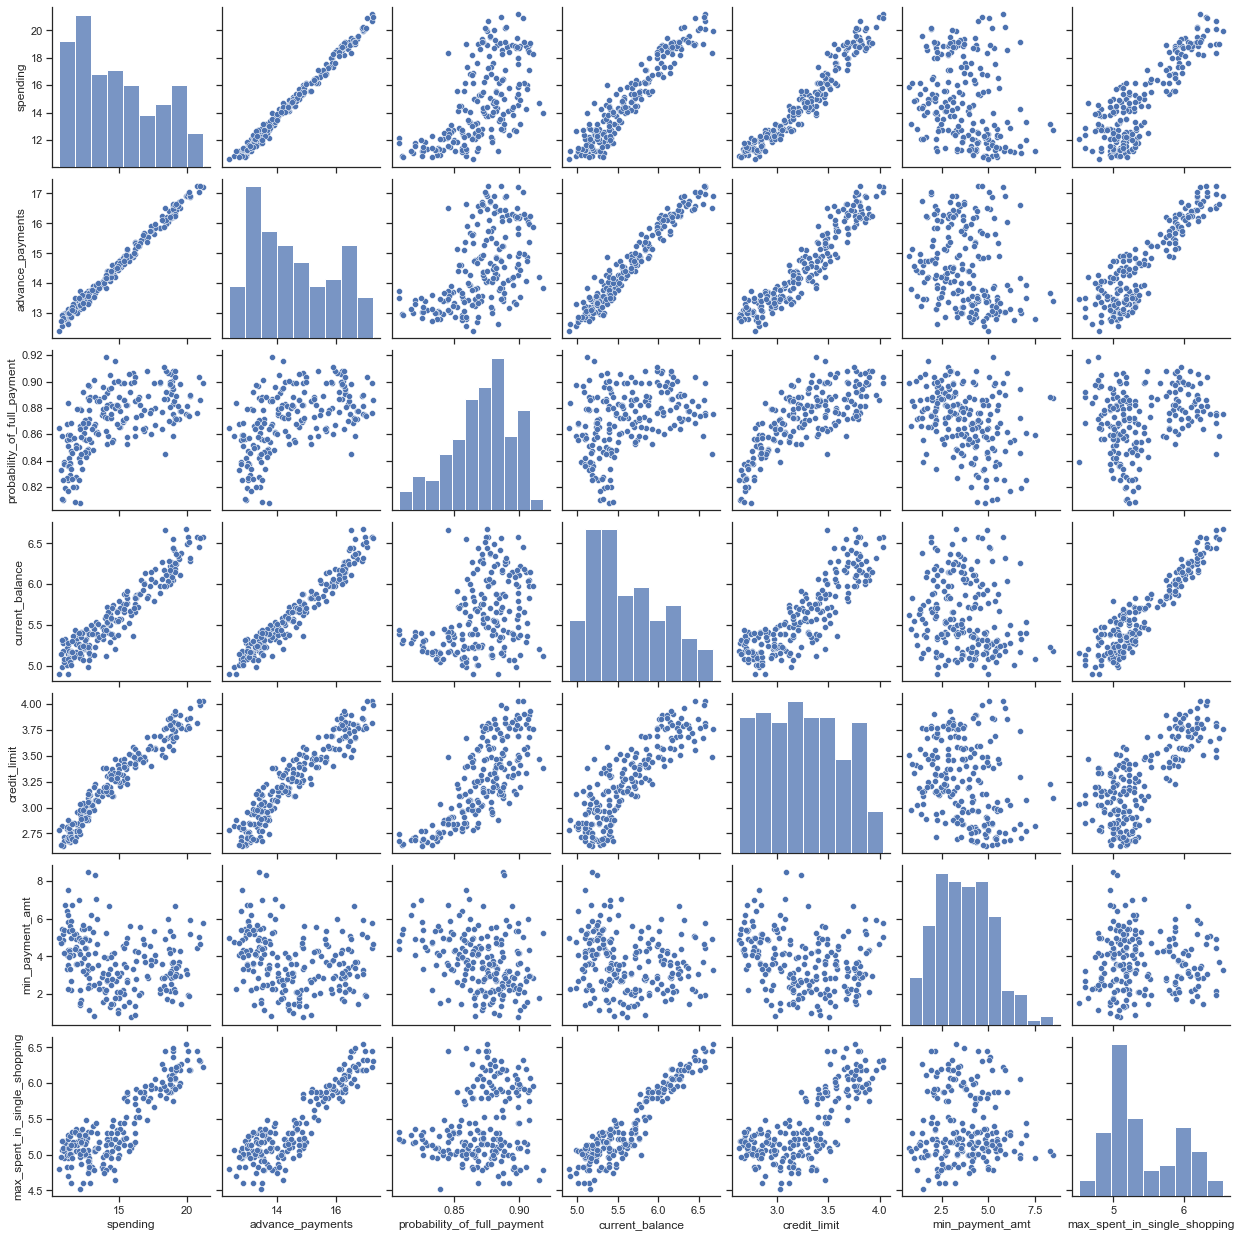

In [46]:
sns.pairplot(df[df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index])
plt.show()

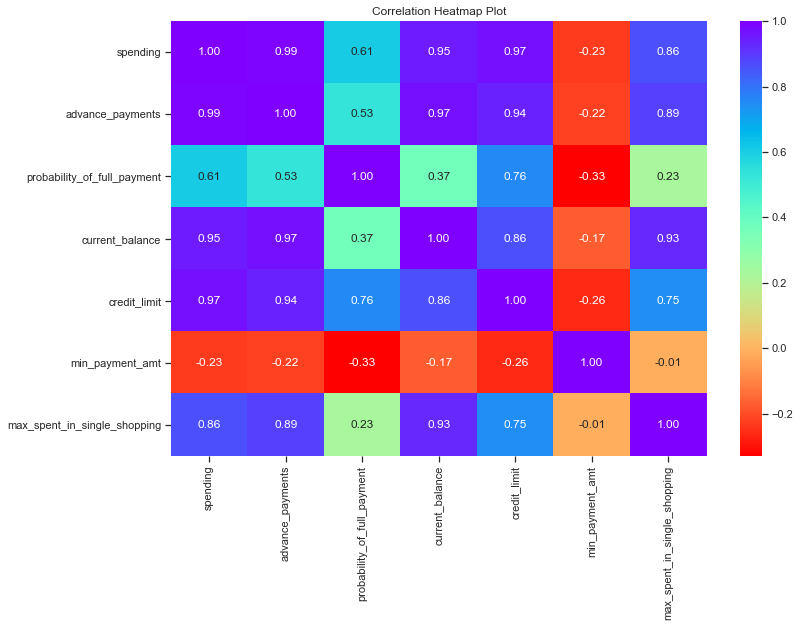

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.corr(),2),fmt='.2f',annot=True,cmap='rainbow_r')
plt.title('Correlation Heatmap Plot')
plt.show()

In [27]:
X = StandardScaler()

In [28]:
scaled_df = pd.DataFrame(X.fit_transform(df), columns=df.columns)

In [29]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
wardlink = linkage(scaled_df, method = 'ward')

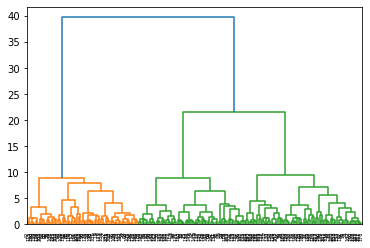

In [32]:
dend = dendrogram(wardlink)

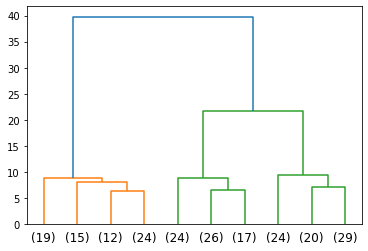

In [33]:
dend = dendrogram(wardlink, truncate_mode = 'lastp', p=10)

In [34]:
from scipy.cluster.hierarchy import fcluster

In [35]:
clusters_ward = fcluster(wardlink, 3, criterion='maxclust')

In [36]:
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [37]:
df['fcluster'] = clusters_ward

In [38]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fcluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [42]:
clusters_ward.clusters_ward.value_counts().sort_index()

AttributeError: 'numpy.ndarray' object has no attribute 'clusters_ward'

In [44]:
Wardlink_1 = linkage(scaled_df, method = 'average')

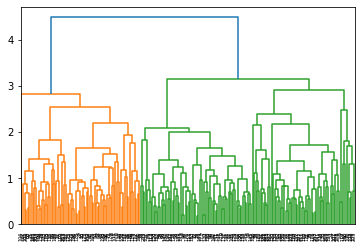

In [46]:
dend_1 = dendrogram(Wardlink_1)

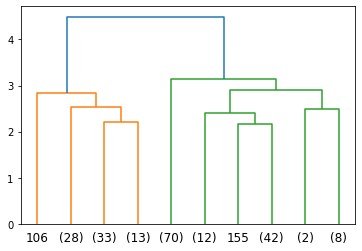

In [47]:
dend = dendrogram(Wardlink_1, truncate_mode = 'lastp', p=10)

In [48]:
clusters_average = fcluster(Wardlink_1, 3, criterion='maxclust')

In [49]:
clusters_average

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [51]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fcluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [54]:
clusters_average_df.clusters_average.value_counts().sort_index()

NameError: name 'clusters_average_df' is not defined

In [56]:
from sklearn.cluster import KMeans

In [57]:
k_means = KMeans(n_clusters = 3, random_state = 10)

In [59]:
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=10)

In [60]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [61]:
wss = []

In [62]:
for i in range (1,11):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [63]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694]

In [72]:
k_means = KMeans(n_clusters = 3, random_state = 1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [73]:
silhouette_score(scaled_df,labels,random_state=1)

0.4007270552751299

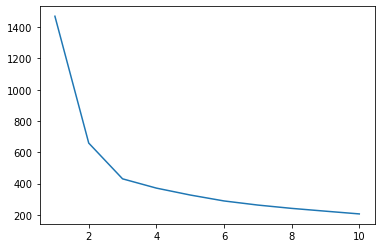

In [74]:
plt.plot(range(1,11),wss)

In [79]:
df['silhouette_score','Kmeans_clusters'] = labels

In [80]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fcluster,Kmeans_clusters,"(silhouette_score, Kmeans_clusters)"
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2,2


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [80]:
df_insurance=pd.read_csv('insurance_part2_data.csv')

In [81]:
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [82]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [83]:
df_insurance.shape

(3000, 10)

In [84]:
df_insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [85]:
df_insurance.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
dups = df_insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


In [87]:
df_insurance.drop_duplicates(inplace=True)

In [88]:
dups = df_insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_insurance.shape)

Number of duplicate rows = 0
(2861, 10)


<AxesSubplot:>

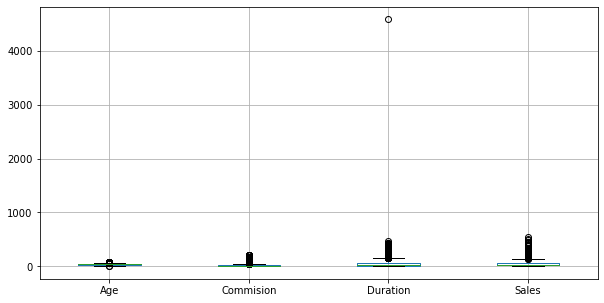

In [89]:
plt.figure(figsize=(10,5))
df_insurance[['Age','Commision', 'Duration', 'Sales']].boxplot()

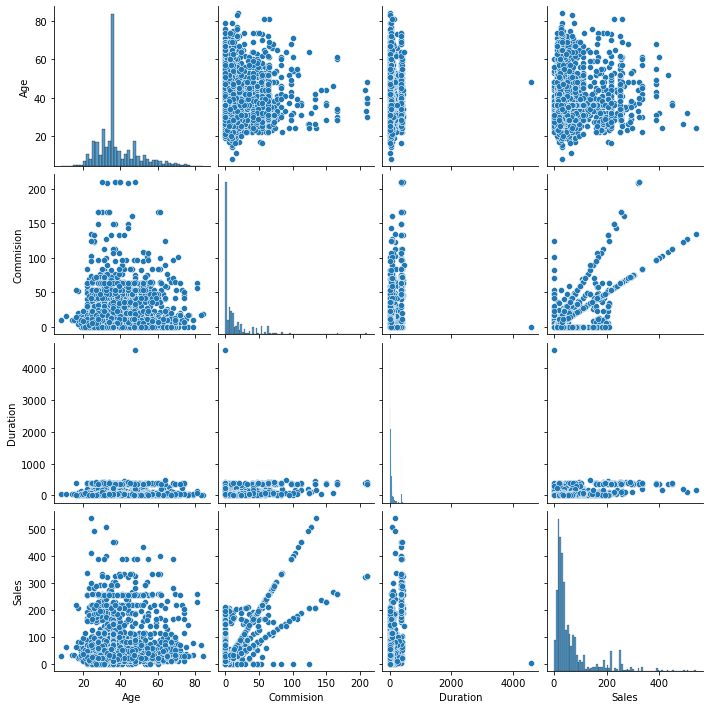

In [90]:
sns.pairplot(df_insurance[['Age','Commision', 'Duration', 'Sales']])

<AxesSubplot:>

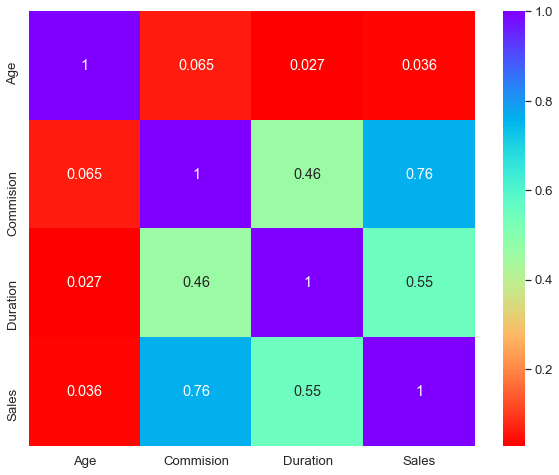

In [91]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_insurance[['Age','Commision', 'Duration', 'Sales']].corr(), annot=True, cmap='rainbow_r')

In [92]:
for feature in df_insurance.columns: 
    if df_insurance[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_insurance[feature].unique()))
        print(pd.Categorical(df_insurance[feature].unique()).codes)
        df_insurance[feature] = pd.Categorical(df_insurance[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [93]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [63]:
df_insurance.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [94]:
df_insurance.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

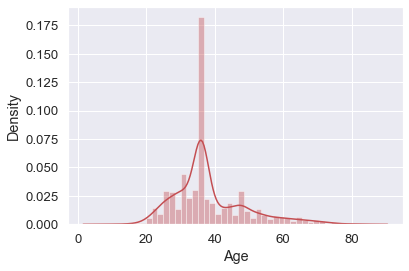

In [110]:
sns.distplot(df_insurance['Age'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

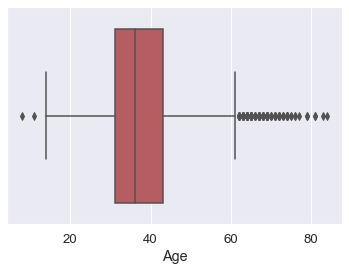

In [111]:
sns.boxplot(df_insurance['Age'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Commision', ylabel='Density'>

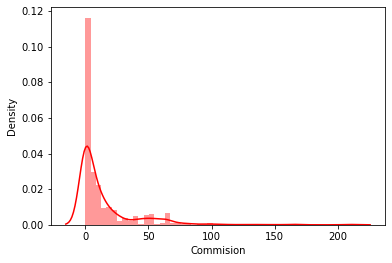

In [7]:
sns.distplot(df_insurance['Commision'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Commision'>

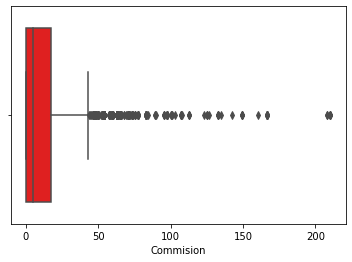

In [8]:
sns.boxplot(df_insurance['Commision'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

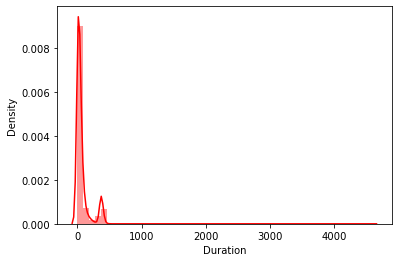

In [9]:
sns.distplot(df_insurance['Duration'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

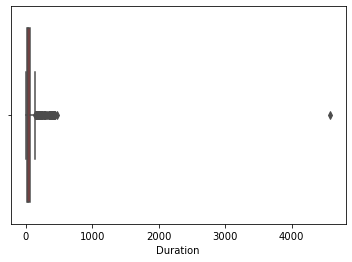

In [12]:
sns.boxplot(df_insurance['Duration'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

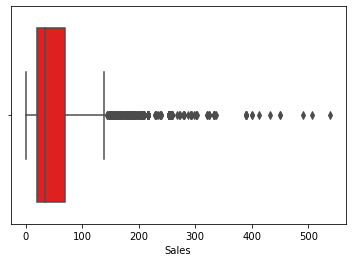

In [10]:
sns.boxplot(df_insurance['Sales'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

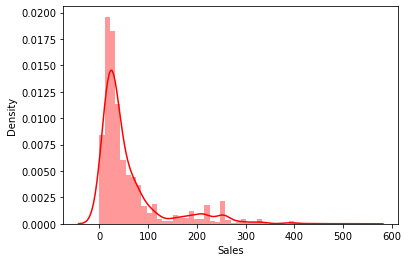

In [11]:
sns.distplot(df_insurance['Sales'], color = "r")

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

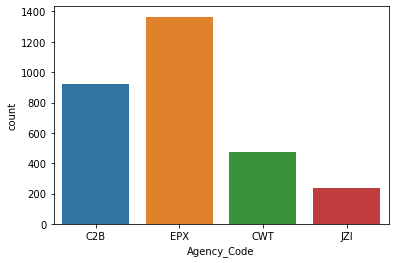

In [13]:
sns.countplot(df_insurance['Agency_Code'])

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

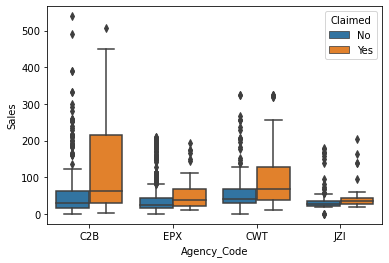

In [15]:
sns.boxplot(data = df_insurance, x = 'Agency_Code', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

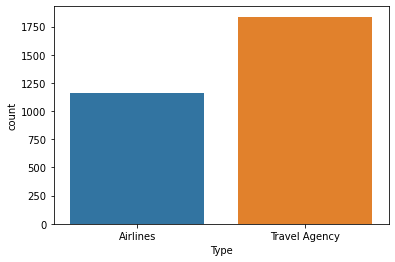

In [17]:
sns.countplot(data = df_insurance, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

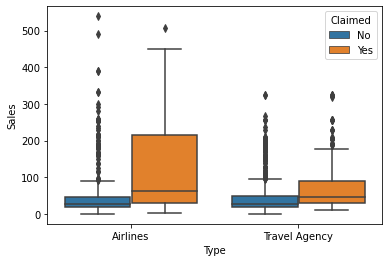

In [18]:
sns.boxplot(data = df_insurance, x = 'Type', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

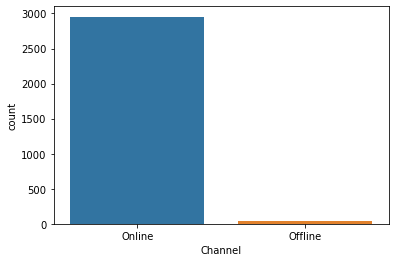

In [19]:
sns.countplot(data = df_insurance, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

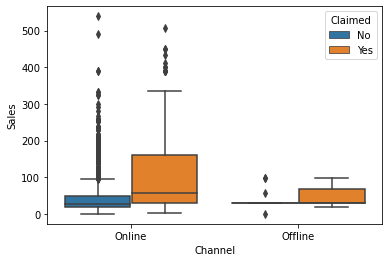

In [20]:
sns.boxplot(data = df_insurance, x = 'Channel', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

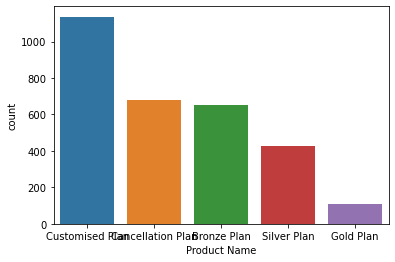

In [21]:
sns.countplot(data = df_insurance, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

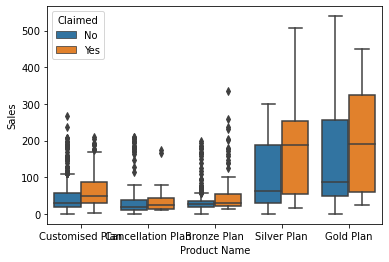

In [22]:
sns.boxplot(data = df_insurance, x = 'Product Name', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

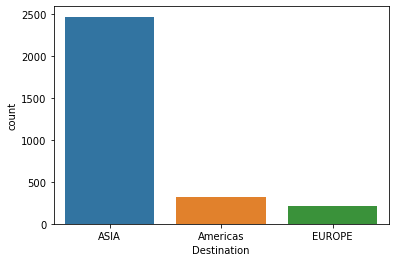

In [23]:
sns.countplot(data = df_insurance, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

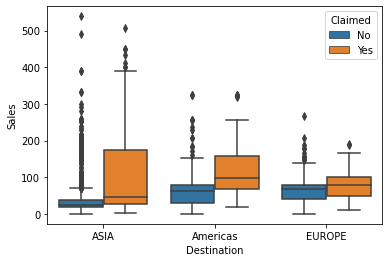

In [25]:
sns.boxplot(data = df_insurance, x = 'Destination', y = 'Sales', hue = 'Claimed')

In [103]:
X= df_insurance.drop("Claimed",axis=1)
y= df_insurance.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [104]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size = .30, random_state= 1)

In [105]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('train_labels', train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [106]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [107]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [113]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp', ascending = False))

                   Imp
Duration      0.261934
Sales         0.236329
Age           0.198581
Agency_Code   0.168709
Commision     0.070427
Product Name  0.032213
Destination   0.027900
Channel       0.003908
Type          0.000000


In [121]:
param_grid = {
    'max_depth':[4,5,6],
    'min_samples_leaf':[20,40,60,70],
    'min_samples_split':[150,200,250,300]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [122]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [20, 40, 60, 70],
                         'min_samples_split': [150, 200, 250, 300]})

In [124]:
DecisionTreeClassifier(max_depth= 4,min_samples_leaf = 20, min_samples_split= 150)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=150)

In [125]:
reg_dt_model= DecisionTreeClassifier(criterion = 'gini', max_depth= 4,min_samples_leaf = 20, min_samples_split= 150)

In [126]:
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=150)

In [128]:
insurance_prediction_tree_regularized= open(bank_marketing_part1_Data.csv)

NameError: name 'bank_marketing_part1_Data' is not defined

In [129]:
ytrain_predict_dt=reg_dt_model.predict(X_train)

In [130]:
ytest_predict_dt=reg_dt_model.predict(X_test)

In [108]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.198581
Agency_Code   0.168709
Type          0.000000
Commision     0.070427
Channel       0.003908
Duration      0.261934
Sales         0.236329
Product Name  0.032213
Destination   0.027900


In [ ]:
train_char_label = ['No', 'Yes']
insurance_prediction_Tree_File = open('C:\Users\WELCOME\Downloads\PYTHON FILES\4.Data Mining\Project\insurance_prediction.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance_prediction_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_prediction_Tree_File.close()